In [1]:
#imports
import itertools
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy.random import multivariate_normal as N
from sklearn.mixture import GaussianMixture
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)


## Create normal distributions

In [2]:
#create normal distributions
#X1 = N1
N1 = N([0,0], [[100,0],[0,3]], size=1000)
X1 = N1

#X2 = N1 + N2
N1 = N([0,0], [[100,0],[0,3]], size=500)
N2 = N([0,6], [[100,0],[0,3]], size=500)
X2 = np.concatenate((N1 , N2))

#X3 = N1 + N2 + N3
N1 = N([0,0], [[100,0],[0,3]], size=333)
N2 = N([0,6], [[100,0],[0,3]], size=333)
N3 = N([0,12], [[100,0],[0,3]], size=334)
X3 = np.concatenate((N1 , N2 , N3))

## Plot distributions

In [3]:
def heatmap(X,bins=20):
    #returns a heatmap of the 2D distribution
    heatmap, xedges, yedges = np.histogram2d(X[:,0], X[:,1], bins=bins)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    plt.xlabel('1st diminsion')
    plt.ylabel('2nd diminsion')
    plt.imshow(heatmap.T, extent=extent, origin='lower', aspect="auto")
    plt.colorbar()

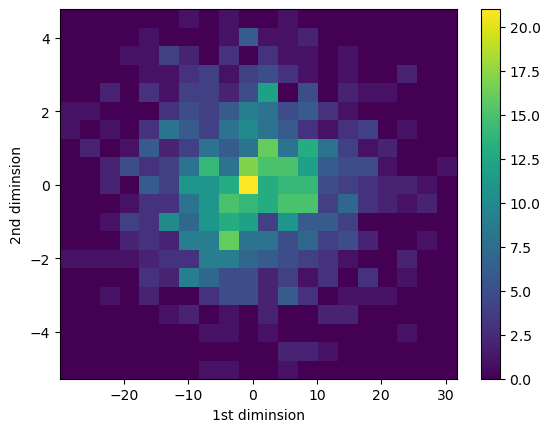

In [4]:
heatmap(X1)

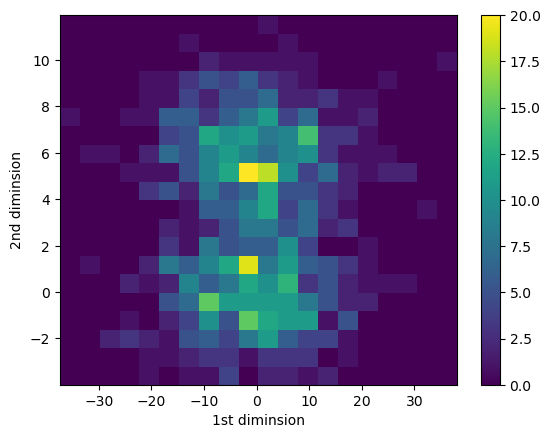

In [5]:
heatmap(X2)

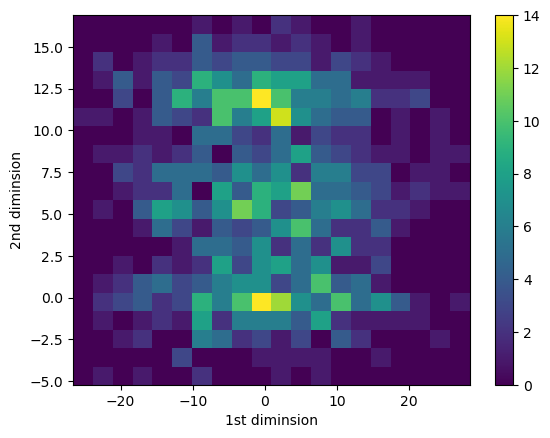

In [6]:
heatmap(X3)

## Plot distributions with more samples

to have a more clear image of the shape of the distributions.

In [7]:
#recreate normal distributions with more samples
#X1 = N1
N1 = N([0,0], [[100,0],[0,3]], size=1000000)
X1_ = N1

#X2 = N1 + N2
N1 = N([0,0], [[100,0],[0,3]], size=500000)
N2 = N([0,6], [[100,0],[0,3]], size=500000)
X2_ = np.concatenate((N1 , N2))

#X3 = N1 + N2 + N3
N1 = N([0,0], [[100,0],[0,3]], size=333333)
N2 = N([0,6], [[100,0],[0,3]], size=333333)
N3 = N([0,12], [[100,0],[0,3]], size=333334)
X3_ = np.concatenate((N1 , N2 , N3))

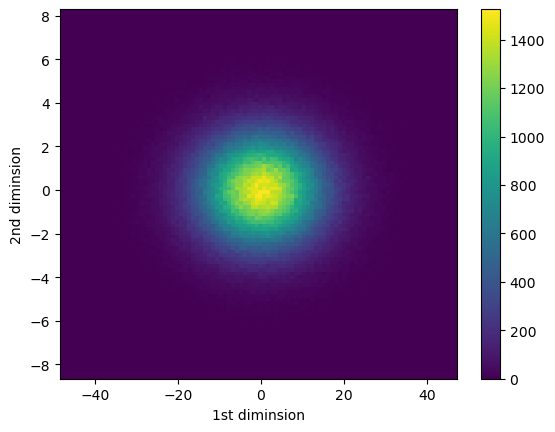

In [8]:
heatmap(X1_,bins=100)

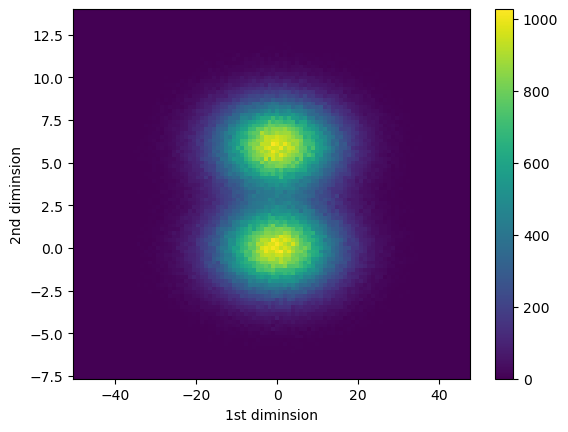

In [9]:
heatmap(X2_,bins=100)

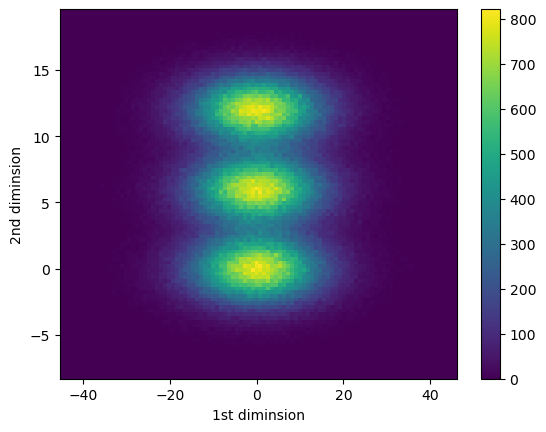

In [10]:
heatmap(X3_,bins=100)

# GMM

In [11]:
# define a plot function
color_iter = itertools.cycle(["navy", "c", "cornflowerblue", "gold", "darkorange"])

def plot_GMM(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 3, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180.0 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xticks(())
    plt.yticks(())
    plt.title(title)

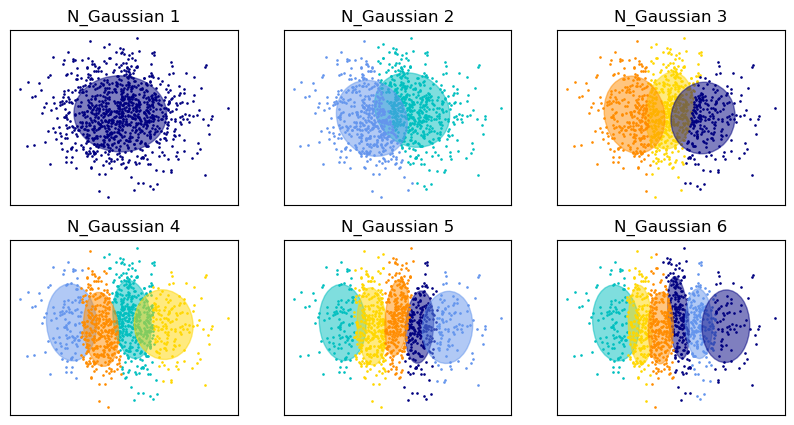

In [ ]:
# X1
plt.figure(figsize = (10,5))
avg_prob = np.zeros(6)
avg_silhouette = np.zeros(6)
for i in range(1,7):
    GMM = GaussianMixture(n_components=i,random_state=0)
    GMM.fit(X1)
    avg_prob[i-1] = GMM.predict_proba(X1).max(axis=1).mean()
    avg_silhouette[i-1] = metrics.silhouette_score(X1, GMM.predict(X1), metric='euclidean') if i !=1 else 0
    plot_GMM(X1, GMM.predict(X1), GMM.means_, GMM.covariances_, i-1, "N_Gaussian {}".format(i))
plt.show()
plt.plot(np.arange(1,7),avg_prob)
plt.xlabel("N_Gaussian");plt.title("average probability")
plt.show()
plt.plot(np.arange(2,7),avg_silhouette[1:])
plt.xlabel("N_Gaussian");plt.title("silhouette score")
plt.show()

In [ ]:
# X2
plt.figure(figsize = (10,5))
avg_prob = np.zeros(6)
avg_silhouette = np.zeros(6)
for i in range(1,7):
    GMM = GaussianMixture(n_components=i,random_state=0)
    GMM.fit(X2)
    avg_prob[i-1] = GMM.predict_proba(X2).max(axis=1).mean()
    avg_silhouette[i-1] = metrics.silhouette_score(X2, GMM.predict(X2), metric='euclidean') if i !=1 else 0
    plot_GMM(X2, GMM.predict(X2), GMM.means_, GMM.covariances_, i-1, "N_Gaussian {}".format(i))
plt.show()
plt.plot(np.arange(1,7),avg_prob)
plt.xlabel("N_Gaussian");plt.title("average probability")
plt.show()
plt.plot(np.arange(2,7),avg_silhouette[1:])
plt.xlabel("N_Gaussian");plt.title("silhouette score")
plt.show()

In [ ]:
# X3
plt.figure(figsize = (10,5))
avg_prob = np.zeros(6)
avg_silhouette = np.zeros(6)
for i in range(1,7):
    GMM = GaussianMixture(n_components=i,random_state=0)
    GMM.fit(X3)
    avg_prob[i-1] = GMM.predict_proba(X3).max(axis=1).mean()
    avg_silhouette[i-1] = metrics.silhouette_score(X3, GMM.predict(X3), metric='euclidean') if i !=1 else 0
    plot_GMM(X3, GMM.predict(X3), GMM.means_, GMM.covariances_, i-1, "N_Gaussian {}".format(i))
plt.show()
plt.plot(np.arange(1,7),avg_prob)
plt.xlabel("N_Gaussian");plt.title("average probability")
plt.show()
plt.plot(np.arange(2,7),avg_silhouette[1:])
plt.xlabel("N_Gaussian");plt.title("silhouette score")
plt.show()
